# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=300)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=300)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

191


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
lat = []
long= []
temp = []
maxtemp=[]
humid=[]
cloud=[]
windsp=[]
country=[]
date=[]
name=[]
city_ct=0

print('Beginning Data Retrieval')     
print ("-----------------------------")
# Loop through the list of cities and perform a request for data on each
#set try/except to pass over the cities that are not found in the API (they will show as a KeyError)
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windsp.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        city_ct = city_ct + 1
        if city_ct == 50:
            time.sleep(30)
    except KeyError:
        print("City not found. Skipping.....")
        #pass
        
    #for city, value in cities.len():
    print (f"Processing Record {city_ct} for {city}")

Beginning Data Retrieval
-----------------------------
Processing Record 1 for mataura
Processing Record 2 for albany
Processing Record 3 for kieta
Processing Record 4 for maningrida
Processing Record 5 for vao
Processing Record 6 for baykit
Processing Record 7 for san patricio
City not found. Skipping.....
Processing Record 7 for illoqqortoormiut
Processing Record 8 for yuli
Processing Record 9 for tasiilaq
Processing Record 10 for bethel
City not found. Skipping.....
Processing Record 10 for amderma
Processing Record 11 for college
Processing Record 12 for punta arenas
Processing Record 13 for beira
Processing Record 14 for cherskiy
Processing Record 15 for soyo
Processing Record 16 for port elizabeth
Processing Record 17 for hermanus
Processing Record 18 for strezhevoy
Processing Record 19 for georgetown
Processing Record 20 for busselton
Processing Record 21 for mar del plata
Processing Record 22 for new norfolk
Processing Record 23 for ushuaia
Processing Record 24 for cape town
Pr

In [150]:
city_dict={
    "City": name,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": maxtemp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": windsp,
    "Country": country,
    "Date": date,
}
city_data_pd= pd.DataFrame(city_dict)
city_data_pd

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Newport News,36.9788,-76.4280,55.15,87,100,8.05,US,1643835507
1,Busselton,-33.6500,115.3333,66.04,49,100,14.92,AU,1643835761
2,Rikitea,-23.1203,-134.9692,78.17,73,100,5.37,PF,1643835761
3,Puerto Ayora,-0.7393,-90.3518,78.55,89,40,5.01,EC,1643835761
4,Latung,5.5000,120.8833,79.86,77,92,4.05,PH,1643835762
...,...,...,...,...,...,...,...,...,...
160,Saldanha,-33.0117,17.9442,66.45,85,96,6.64,ZA,1643835847
161,Ketchikan,55.3422,-131.6461,37.38,93,100,5.75,US,1643835847
162,New Norfolk,-42.7826,147.0587,56.75,62,67,1.01,AU,1643835848
163,Saskylakh,71.9167,114.0833,-30.06,100,29,2.71,RU,1643835848


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
city_dict={
    "City": name,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": maxtemp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": windsp,
    "Country": country,
    "Date": date,
}
city_data_pd= pd.DataFrame(city_dict)
city_data_pd

NameError: name 'name' is not defined

In [1]:
city_data_pd.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

NameError: name 'city_data_pd' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [165]:
#reduce the dataset by only taking the cities that have a humidity less than 100%
#rather than dropping the ones that dont meet the desired conditions, keep the ones that do   

clean_city_data=city_data_pd[city_data_pd["Humidity"] < 100]
clean_city_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Newport News,36.9788,-76.4280,55.15,87,100,8.05,US,1643835507
1,Busselton,-33.6500,115.3333,66.04,49,100,14.92,AU,1643835761
2,Rikitea,-23.1203,-134.9692,78.17,73,100,5.37,PF,1643835761
3,Puerto Ayora,-0.7393,-90.3518,78.55,89,40,5.01,EC,1643835761
4,Latung,5.5000,120.8833,79.86,77,92,4.05,PH,1643835762
...,...,...,...,...,...,...,...,...,...
159,Daru,-9.0763,143.2092,74.52,83,100,5.68,PG,1643835846
160,Saldanha,-33.0117,17.9442,66.45,85,96,6.64,ZA,1643835847
161,Ketchikan,55.3422,-131.6461,37.38,93,100,5.75,US,1643835847
162,New Norfolk,-42.7826,147.0587,56.75,62,67,1.01,AU,1643835848


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

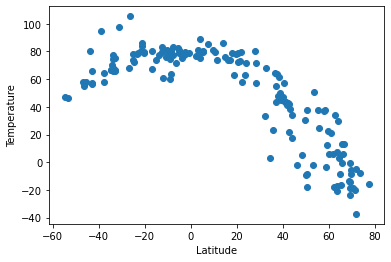

In [153]:
x_values = clean_city_data['Latitude']
y_values = clean_city_data['Max Temperature']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

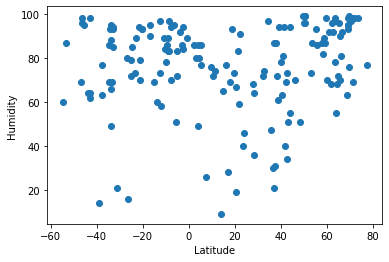

In [154]:
x_values = clean_city_data['Latitude']
h_values = clean_city_data['Humidity']

plt.scatter(x_values,h_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

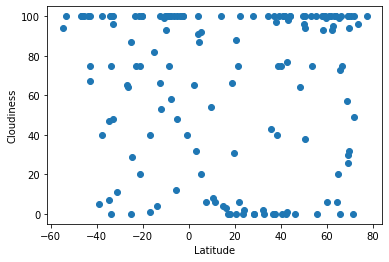

In [155]:
x_values = clean_city_data['Latitude']
c_values = clean_city_data['Cloudiness']

plt.scatter(x_values,c_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

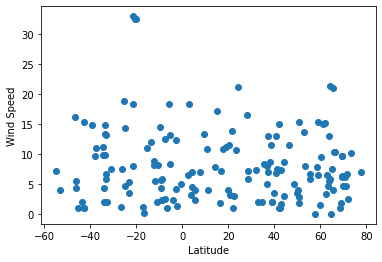

In [156]:
x_values = clean_city_data['Latitude']
w_values = clean_city_data['Wind Speed']

plt.scatter(x_values,w_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

The r-value is: 0.6036825763827486


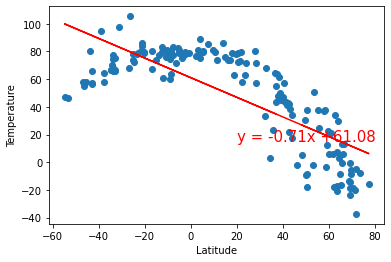

In [157]:
x_values = clean_city_data['Latitude']
y_values = clean_city_data['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [144]:
#Filter together northern and southern hemispheres into their own DF's
northern_df=clean_city_data.loc[clean_city_data["Latitude"] >=0,:]
southern_df=clean_city_data.loc[clean_city_data["Latitude"] <0,:]



In [145]:
northern_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vostok,46.4856,135.8833,-5.91,99,100,3.56,RU,1643834476
3,Tubualá,9.5167,-79.0333,90.34,73,14,9.22,PA,1643834477
4,Hilo,19.7297,-155.0900,78.53,69,40,0.00,US,1643834477
5,Chokurdakh,70.6333,147.9167,-18.92,97,100,6.24,RU,1643834478
6,Albany,42.6001,-73.9662,45.73,72,77,3.00,US,1643833801


In [146]:
southern_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Busselton,-33.6500,115.3333,66.04,49,100,14.92,AU,1643834476
2,Mataura,-46.1927,168.8643,57.47,98,100,4.25,NZ,1643834477
10,Huarmey,-10.0681,-78.1522,76.19,69,53,13.69,PE,1643834479
15,Vaini,-21.2000,-175.2000,84.36,79,40,5.75,TO,1643834481
17,Mangaratiba,-22.9597,-44.0406,78.03,90,99,2.95,BR,1643834481


The r-value is: 0.8637674306217462


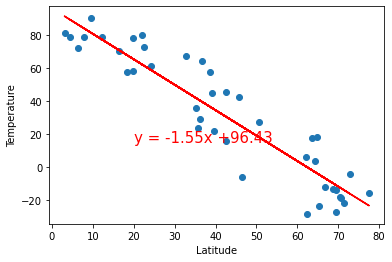

In [158]:
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5509592376978723


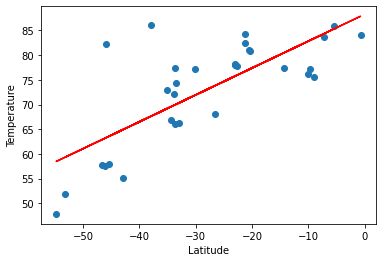

In [160]:
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16777444538812394


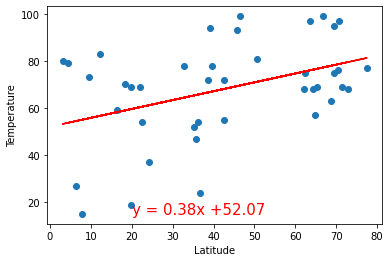

In [161]:
x_values = northern_df['Latitude']
h_values = northern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, h_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,h_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern_df['Latitude']
h_values = southern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, h_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,h_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14698652994894262


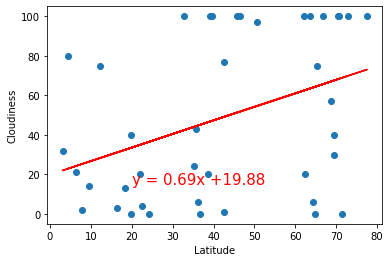

In [162]:
x_values = northern_df['Latitude']
c_values = northern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, c_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,c_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0016163237782819996


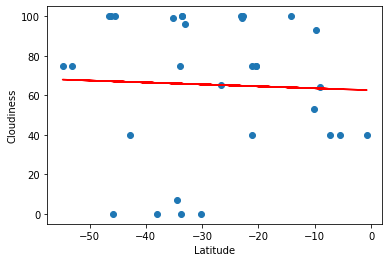

In [164]:
x_values = southern_df['Latitude']
c_values = southern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, c_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,c_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression